<a href="https://colab.research.google.com/github/lunanine/navie-bayes/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Student Mental Health Analysis During Online Learning.csv")
df

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same
...,...,...,...,...,...,...,...,...,...,...
995,Diya,Female,26,MA,11.3,6.8,9.1,Medium,No,Same
996,Aarav,Male,20,BTech,5.5,6.7,6.8,Low,Yes,Same
997,Myra,Female,15,Class 9,7.1,4.1,1.9,Low,Yes,Declined
998,Myra,Female,20,BA,4.4,7.5,4.5,Medium,No,Improved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Gender']=le.fit_transform(df['Gender'])
df['Anxious Before Exams']=le.fit_transform(df['Anxious Before Exams'])
df['Academic Performance Change']=le.fit_transform(df['Academic Performance Change'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   int64  
 1   Gender                        1000 non-null   int64  
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   int64  
 9   Academic Performance Change   1000 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 78.3+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Education Level']=oe.fit_transform(df[['Education Level']])
df['Stress Level']=oe.fit_transform(df[['Stress Level']])
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,1,1,15,6.0,7.1,8.9,9.3,2.0,0,2
1,16,0,25,9.0,3.3,5.0,0.2,2.0,0,2
2,12,1,20,2.0,9.5,5.4,6.2,2.0,0,2
3,2,1,20,0.0,10.8,5.6,5.5,0.0,1,2
4,4,0,17,4.0,2.8,5.4,3.1,2.0,1,2


In [ ]:
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
Education Level,0
Screen Time (hrs/day),0
Sleep Duration (hrs),0
Physical Activity (hrs/week),0
Stress Level,0
Anxious Before Exams,0
Academic Performance Change,0


In [ ]:
df.corr()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
Name,1.000000,0.249188,0.013762,-0.030088,0.001327,0.010936,-0.051539,-0.000749,0.050356,-0.052633
Gender,0.249188,1.000000,-0.004262,-0.029658,-0.060576,0.011150,0.004643,-0.024299,-0.051054,-0.018660
Age,0.013762,-0.004262,1.000000,0.500895,0.008982,-0.010609,-0.033600,0.007861,-0.008936,0.007487
Education Level,-0.030088,-0.029658,0.500895,1.000000,0.044830,-0.004533,-0.065284,0.037027,-0.054624,-0.004056
Screen Time (hrs/day),0.001327,-0.060576,0.008982,0.044830,1.000000,0.011314,0.028464,-0.020655,0.025945,0.036491
Sleep Duration (hrs),0.010936,0.011150,-0.010609,-0.004533,0.011314,1.000000,-0.013407,-0.025524,0.033224,0.023520
Physical Activity (hrs/week),-0.051539,0.004643,-0.033600,-0.065284,0.028464,-0.013407,1.000000,0.003790,-0.012179,-0.008395
Stress Level,-0.000749,-0.024299,0.007861,0.037027,-0.020655,-0.025524,0.003790,1.000000,-0.019879,-0.030854
Anxious Before Exams,0.050356,-0.051054,-0.008936,-0.054624,0.025945,0.033224,-0.012179,-0.019879,1.000000,-0.004377
Academic Performance Change,-0.052633,-0.018660,0.007487,-0.004056,0.036491,0.023520,-0.008395,-0.030854,-0.004377,1.000000


In [ ]:
df.drop(['Name'],axis=1)

,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,1,15,6.0,7.1,8.9,9.3,2.0,0,2
1,0,25,9.0,3.3,5.0,0.2,2.0,0,2
2,1,20,2.0,9.5,5.4,6.2,2.0,0,2
3,1,20,0.0,10.8,5.6,5.5,0.0,1,2
4,0,17,4.0,2.8,5.4,3.1,2.0,1,2
...,...,...,...,...,...,...,...,...,...
995,0,26,8.0,11.3,6.8,9.1,2.0,0,2
996,1,20,2.0,5.5,6.7,6.8,1.0,1,2
997,0,15,7.0,7.1,4.1,1.9,1.0,1,0
998,0,20,0.0,4.4,7.5,4.5,2.0,0,1


In [ ]:
df.duplicated().sum()
#df.drop_duplicates(inplace=True)

np.int64(0)

In [ ]:
df=df.rename(columns={'Education Level':'Qualifications'})
df.head()

,Name,Gender,Age,Qualifications,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,1,1,15,6.0,7.1,8.9,9.3,2.0,0,2
1,16,0,25,9.0,3.3,5.0,0.2,2.0,0,2
2,12,1,20,2.0,9.5,5.4,6.2,2.0,0,2
3,2,1,20,0.0,10.8,5.6,5.5,0.0,1,2
4,4,0,17,4.0,2.8,5.4,3.1,2.0,1,2


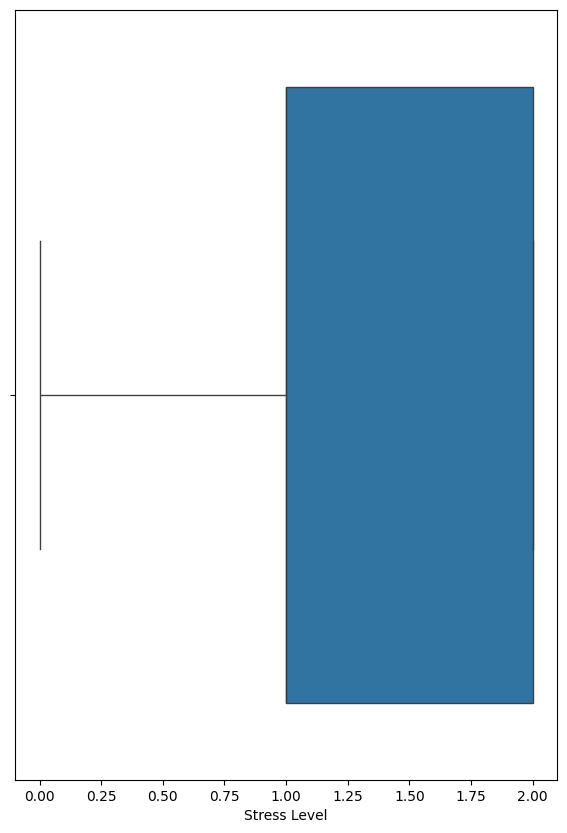

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,10))
sns.boxplot(x='Stress Level',data=df)
plt.show()


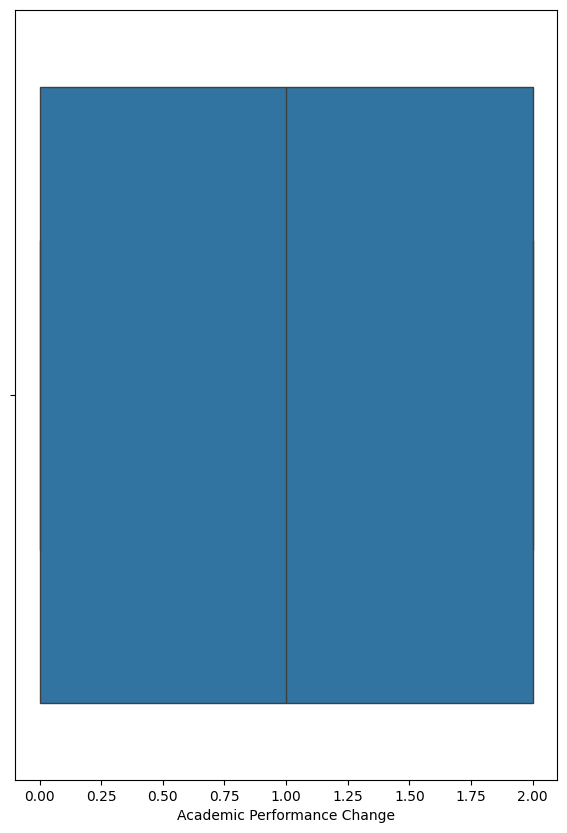

In [ ]:
plt.figure(figsize=(7,10))
sns.boxplot(x='Academic Performance Change',data=df)
plt.show()

In [ ]:
Q1=df['Stress Level'].quantile(0.25)
Q3=df['Stress Level'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

1.0
-0.5
3.5


In [ ]:
Q1=df['Academic Performance Change'].quantile(0.25)
Q3=df['Academic Performance Change'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

2.0
-3.0
5.0


In [ ]:
df=df[~((df['Academic Performance Change']<(Q1-1.5*IQR))|(df['Academic Performance Change']>(Q3+1.5*IQR)))]
Q1=df['Academic Performance Change'].quantile(0.25)
Q3=df['Academic Performance Change'].quantile(0.75)
IQR=Q3-Q1
print(IQR)


2.0


In [ ]:
x=df.drop(['Academic Performance Change'],axis=1)
y=df['Academic Performance Change']

In [ ]:
x

,Name,Gender,Age,Qualifications,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams
0,1,1,15,6.0,7.1,8.9,9.3,2.0,0
1,16,0,25,9.0,3.3,5.0,0.2,2.0,0
2,12,1,20,2.0,9.5,5.4,6.2,2.0,0
3,2,1,20,0.0,10.8,5.6,5.5,0.0,1
4,4,0,17,4.0,2.8,5.4,3.1,2.0,1
...,...,...,...,...,...,...,...,...,...
995,9,0,26,8.0,11.3,6.8,9.1,2.0,0
996,1,1,20,2.0,5.5,6.7,6.8,1.0,1
997,17,0,15,7.0,7.1,4.1,1.9,1.0,1
998,17,0,20,0.0,4.4,7.5,4.5,2.0,0


In [ ]:
y

,Academic Performance Change
0,2
1,2
2,2
3,2
4,2
...,...
995,2
996,2
997,0
998,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.43950503,  0.72422435, -1.54474144, ...,  1.46212953,
         0.90761742, -1.02634696],
       [ 0.3111497 , -0.97983294,  1.34694976, ..., -1.64486158,
         0.90761742, -1.02634696],
       [-0.15569156,  0.72422435, -0.09889584, ...,  0.40370399,
         0.90761742, -1.02634696],
       ...,
       [ 0.42786002, -0.97983294, -1.54474144, ..., -1.06443467,
        -0.40967927,  0.97432938],
       [ 0.42786002, -0.97983294, -0.09889584, ..., -0.17672292,
         0.90761742, -1.02634696],
       [ 1.59496317,  0.72422435,  0.76861152, ..., -0.48400776,
        -0.40967927, -1.02634696]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(800, 9)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)



[2 2 2 2 0 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 0 2 1 2 2 2 2 2 2 2 2
 2 0 2 2 1 2 2 1 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 0 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 0 2 2 2 1 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 1 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.36
[[ 5  8 50]
 [ 2  5 51]
 [10  7 62]]
              precision    recall  f1-score   support

           0       0.29      0.08      0.12        63
           1       0.25      0.09      0.13        58
           2       0.38      0.78      0.51        79

    accuracy                           0.36       200
   macro avg       0.31      0.32      0.26       200
weighted avg       0.32      0.36      0.28       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=9,min_samples_split=8,random_state=23,min_samples_leaf=4,max_features='sqrt')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(y_pred)

[2 2 2 2 2 2 2 1 1 0 2 2 2 0 0 1 1 1 2 2 2 2 2 1 2 0 2 1 1 0 0 0 2 1 2 2 2
 2 0 2 2 1 1 2 1 2 2 0 2 0 2 2 2 1 2 0 2 0 0 2 2 2 2 2 2 2 2 1 2 0 1 2 2 2
 1 0 1 2 0 2 2 0 2 1 2 1 2 1 0 2 2 2 2 2 1 2 2 2 2 0 2 1 0 2 2 1 1 2 1 1 2
 2 2 2 2 2 0 2 2 2 1 2 2 0 2 0 2 2 2 2 1 0 2 2 2 2 0 2 2 1 2 2 2 0 2 2 2 1
 2 2 2 1 0 2 0 1 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 0 2 2 2 1 1 1 1 2 2 2 0 1 2
 2 2 2 0 1 2 1 2 2 1 2 2 1 0 2]


In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.295
[[ 8 15 40]
 [ 7  9 42]
 [18 19 42]]
              precision    recall  f1-score   support

           0       0.24      0.13      0.17        63
           1       0.21      0.16      0.18        58
           2       0.34      0.53      0.41        79

    accuracy                           0.29       200
   macro avg       0.26      0.27      0.25       200
weighted avg       0.27      0.29      0.27       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=6,min_samples_split=4,splitter='best')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(y_pred)

[2 2 2 2 0 2 2 2 2 0 2 2 2 1 2 2 1 2 2 2 0 1 2 2 2 0 2 2 1 0 2 0 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 0 2 1 2 2 2 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 0 0 2 2 0 2 2 0 2 0 2 1 0 2 1 2 2 2 2 2 1 0 2 0 1 0 1 1 0 2 2 2 0 2 2 1 2
 0 2 2 2 1 0 2 1 2 2 0 1 1 2 1 1 2 2 2 1 0 2 2 0 2 2 2 2 2 0 2 0 1 2 2 2 2
 1 2 2 2 0 2 0 1 2 2 2 2 2 0 2 2 0 2 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 0 0 2 2 2 0 2]


In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.415
[[17  4 42]
 [ 7 13 38]
 [17  9 53]]
              precision    recall  f1-score   support

           0       0.41      0.27      0.33        63
           1       0.50      0.22      0.31        58
           2       0.40      0.67      0.50        79

    accuracy                           0.41       200
   macro avg       0.44      0.39      0.38       200
weighted avg       0.43      0.41      0.39       200

